In [164]:
# Import Dependencies
%matplotlib inline

# Data Manupilation
import pandas as pd
import numpy as np


# visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('default')


#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
dataset= pd.read_csv('HousePrice.csv')

In [34]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
dataset.shape

(1460, 81)

# Missing Values

In [112]:
# list of features having missing values
features_with_nan=[features for features in dataset.columns if dataset[features].isnull().sum()>=1]
# Print feature name and percentage of missing values
for feature in features_with_nan:
    print(feature, np.round(dataset[feature].isnull().mean(), 4), ' % missing_values')
    


LotFrontage 0.1774  % missing_values
Alley 0.9377  % missing_values
MasVnrType 0.0055  % missing_values
MasVnrArea 0.0055  % missing_values
BsmtQual 0.0253  % missing_values
BsmtCond 0.0253  % missing_values
BsmtExposure 0.026  % missing_values
BsmtFinType1 0.0253  % missing_values
BsmtFinType2 0.026  % missing_values
Electrical 0.0007  % missing_values
FireplaceQu 0.4726  % missing_values
GarageType 0.0555  % missing_values
GarageYrBlt 0.0555  % missing_values
GarageFinish 0.0555  % missing_values
GarageQual 0.0555  % missing_values
GarageCond 0.0555  % missing_values
PoolQC 0.9952  % missing_values
Fence 0.8075  % missing_values
MiscFeature 0.963  % missing_values


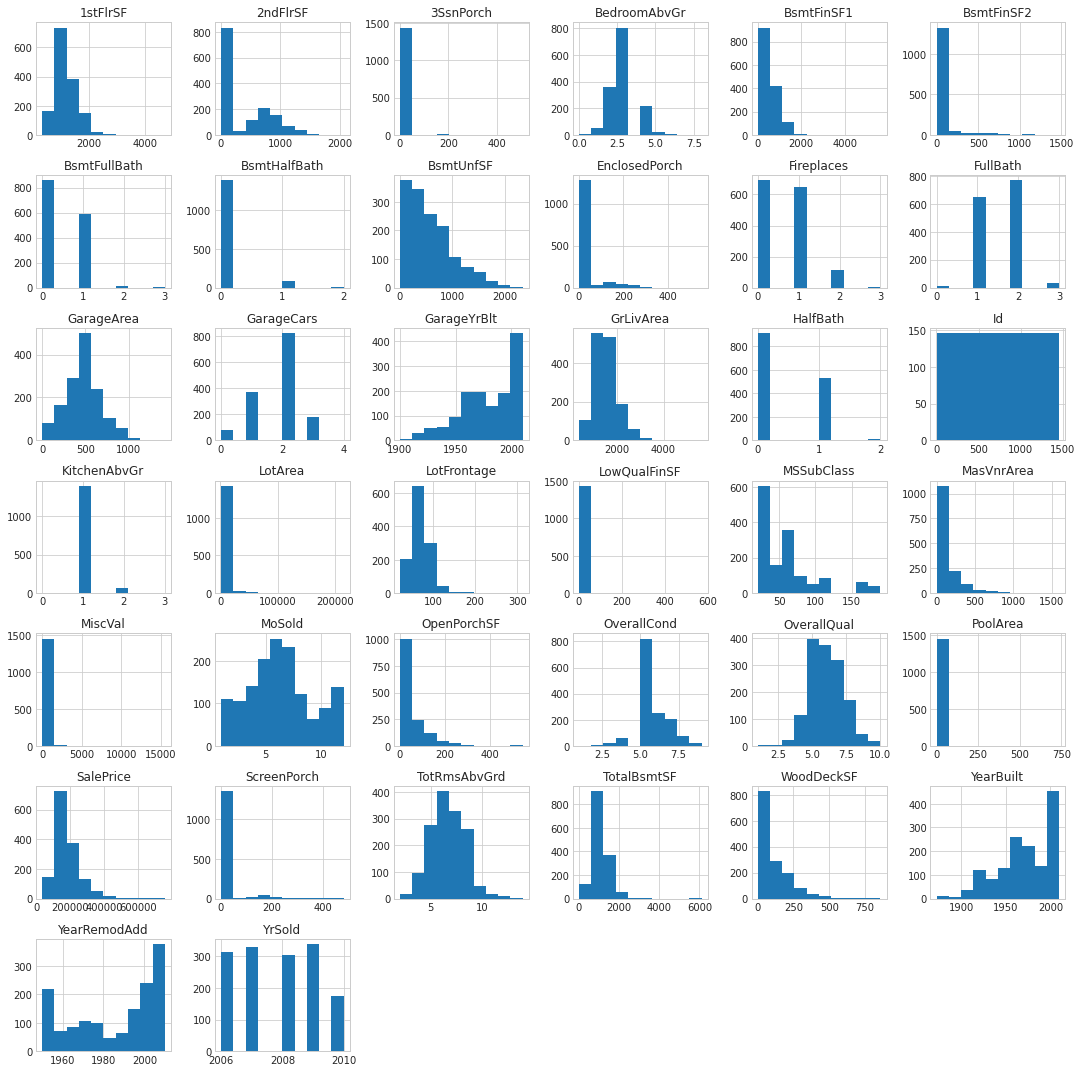

In [53]:
dataset.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

In [54]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [56]:

dataset.duplicated().sum()

0

# Numerical Variables

In [111]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [110]:
# List of Numerical Variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes!='O']
print('Number of numerical variables:', len(numerical_features))

dataset[numerical_features].head()

Number of numerical variables: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [162]:
# List Year information
# List of Numerical Variables
year_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
#print('Number of numerical variables:', len(year_features))
year_features
#dataset[year_features]

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

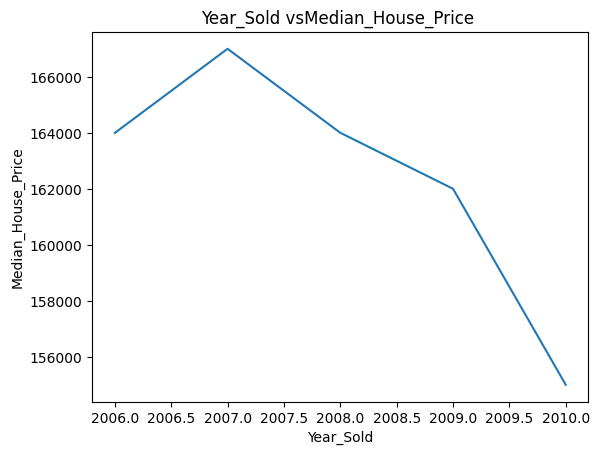

<Figure size 1000x500 with 0 Axes>

In [169]:
# Analyzing the relation between YrSold and SalePrice

dataset.groupby('YrSold')["SalePrice"].median().plot()
plt.xlabel('Year_Sold')
plt.ylabel('Median_House_Price')
plt.title('Year_Sold vsMedian_House_Price ')
plt.figure(figsize=(10,5))

plt.show()

In [173]:
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

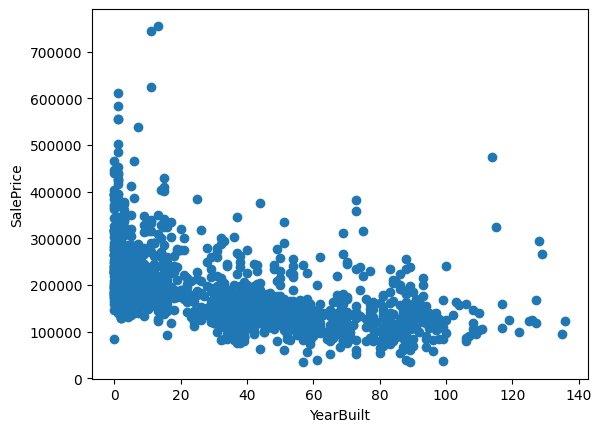

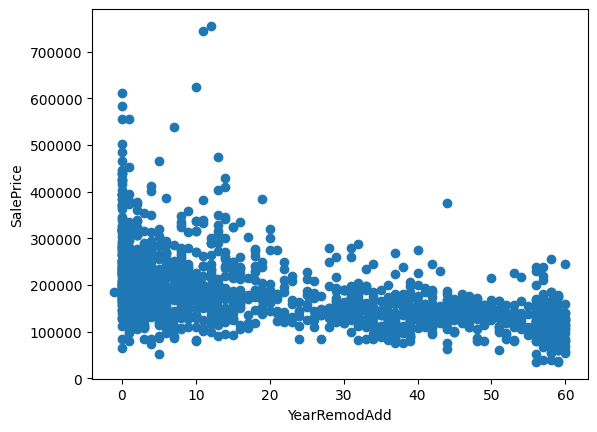

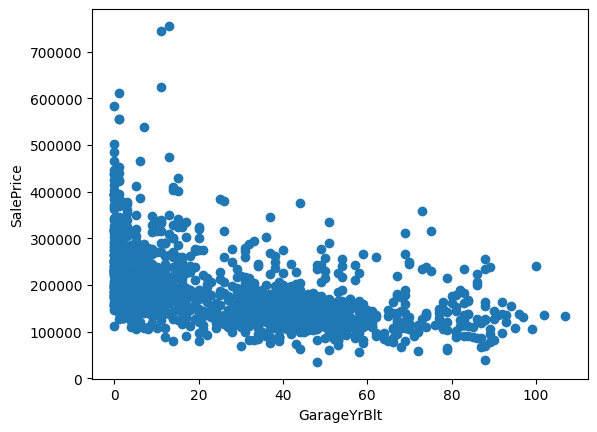

In [177]:
# Comparing all Yrs feature with SalePrice

for feature in year_features:
    if feature != 'YrSold':
        data= dataset.copy()
        data[feature]= data['YrSold']-data[feature] # diff of year and year of house SalePrice
        
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [182]:
# Numerical Variables are 2 types: Discrete var, continuous Var
discrete_feature= [feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_features+['Id']]
print('Discrete Variables Count: ', format(len(discrete_feature)))

Discrete Variables Count:  17


In [183]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [80]:
continuous_labels= list(continuous.columns)
#i=1
plt.figure(figsize=(15,30))
for var in continuous_labels:
    #plt.subplot(round(len(continuous_labels),0)/3+3,4,i)
    plt.boxplot(continuous[var], whis=5)
    plt.title(var)
    i+=1
    
plt.tight_layout()
plt.show()

NameError: name 'continuous' is not defined